In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mutual_info_score

In [2]:
data_ = pd.read_csv('housing.csv')

In [3]:
features = [
    
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'

]

In [4]:
data = data_[features].copy()
data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data['total_bedrooms'].replace([np.nan], 0, inplace=True)
data.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
data.dtypes


latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [27]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


+ Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
+ Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
+ Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [6]:
data['rooms_per_household'] = data['total_rooms'] / data['households']

In [7]:
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

In [8]:
data['population_per_household'] = data['population'] / data['households']

# Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [9]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
obs = [(x, np.sum(data['ocean_proximity']==x)) for x in data['ocean_proximity'].unique()]

In [11]:
obs


[('NEAR BAY', 2290),
 ('<1H OCEAN', 9136),
 ('INLAND', 6551),
 ('NEAR OCEAN', 2658),
 ('ISLAND', 5)]

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [14]:
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [112]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(len(X_train), len(X_test), len(X_val))

12384 4128 4128


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [28]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']
categorical = ['ocean_proimity']

In [37]:
X_train_full[numerical].corrwith(y_train_full).to_frame('correlation')

,correlation
latitude,-0.142983
longitude,-0.046349
housing_median_age,0.103706
total_rooms,0.133989
total_bedrooms,0.047980
population,-0.026032
households,0.063714
median_income,0.690647
rooms_per_household,0.158485
bedrooms_per_room,-0.257419


In [39]:
corr = X_train_full[numerical].corr()

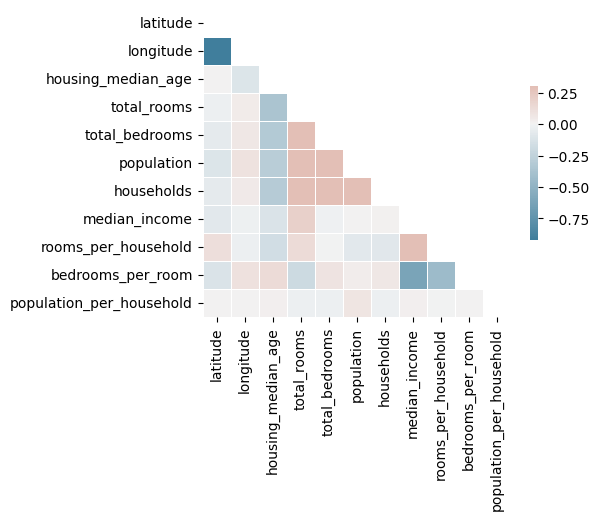

In [44]:
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


In [45]:
corr

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924485,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,0.110695,-0.118938,0.005837
longitude,-0.924485,1.000000,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.029339,0.097280,-0.000598
housing_median_age,0.005296,-0.101818,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,-0.160892,0.135495,0.016245
total_rooms,-0.029224,0.038676,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.136090,-0.189316,-0.024991
total_bedrooms,-0.059998,0.063064,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,-0.001659,0.084149,-0.028536
population,-0.102499,0.094276,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.073733,0.035134,0.072330
households,-0.064061,0.049306,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,-0.083062,0.064185,-0.027656
median_income,-0.076571,-0.017040,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.336013,-0.616669,0.022061
rooms_per_household,0.110695,-0.029339,-0.160892,0.136090,-0.001659,-0.073733,-0.083062,0.336013,1.000000,-0.435169,-0.004922
bedrooms_per_room,-0.118938,0.097280,0.135495,-0.189316,0.084149,0.035134,0.064185,-0.616669,-0.435169,1.000000,0.003938


In [46]:
np.corrcoef(X_train_full['total_bedrooms'], X_train_full['households'])

array([[1.        , 0.98025452],
       [0.98025452, 1.        ]])

total_bedrooms vs households

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.


In [49]:
def above_average(x):
    return 1 if x > mean_median else 0

In [88]:
mean_median_full = y_train_full.mean()
mean_median_full

207194.6937378876

In [89]:
mean_median_train = y_train.mean()

In [53]:
above_average = [1 if x > mean_median else 0 for x in y_train_full]

In [108]:
y_train_binarized = [1 if x > mean_median_train else 0 for x in y_train]
y_val_binarized = [1 if x > mean_median_train else 0 for x in y_val]

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16


In [75]:
def calculate_mi(series):
    return mutual_info_score(series, y_train_full)

In [85]:
round(mutual_info_score(X_train_full['ocean_proximity'], above_average), 2)

0.1

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95


In [56]:
from sklearn.feature_extraction import DictVectorizer

In [92]:
train_dict = X_train.to_dict(orient='records')
train_dict[0]

{'latitude': 34.43,
 'longitude': -119.67,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1H OCEAN',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [93]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [94]:
X_train = dv.transform(train_dict)

In [95]:
X_train.shape

(12384, 16)

In [96]:
dv.get_feature_names()

/home/test/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [97]:
model.fit(X_train, y_train_binarized)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

Transform the validation set using DictVectorizer

In [98]:
val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [100]:
model.predict_proba(X_val)[:, 
                           1]

array([0.07908992, 0.1749244 , 0.95259667, ..., 0.96131742, 0.85202637,
       0.47117608])

In [104]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [101]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_val_binarized, y_pred)

0.8362403100775194

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [120]:
features_train = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity'

]

In [122]:
accuracies = {}
for feat in features_train:
    X_train_c = X_train.copy()
    X_train_c.drop(columns=feat, inplace=True)
    train_c_dict = X_train_c.to_dict(orient='records')
    X_train_c = dv.transform(train_c_dict)
    
    X_val_c = X_val.copy()
    X_val_c.drop(columns=feat, inplace=True)
    val_c_dict = X_val_c.to_dict(orient='records')
    X_val_c = dv.transform(val_c_dict)    
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_c, y_train_binarized)
    accuracies[feat] = accuracy_score(y_val_binarized, model.predict(X_val_c))
    

In [126]:
accuracies

{'latitude': 0.8333333333333334,
 'longitude': 0.8313953488372093,
 'housing_median_age': 0.8301841085271318,
 'total_rooms': 0.8364825581395349,
 'total_bedrooms': 0.8359980620155039,
 'population': 0.8263081395348837,
 'households': 0.8340600775193798,
 'median_income': 0.7848837209302325,
 'ocean_proximity': 0.8204941860465116}

In [127]:
accuracy = 0.8362403100775194

In [152]:
for feat, acc in accuracies.items():
    print(feat, round(acc - accuracy, 15))

latitude -0.002906976744186
longitude -0.00484496124031
housing_median_age -0.006056201550388
total_rooms 0.000242248062015
total_bedrooms -0.000242248062016
population -0.009932170542636
households -0.00218023255814
median_income -0.051356589147287
ocean_proximity -0.015746124031008



### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [140]:
X = data.drop(columns=['median_house_value'])
y = np.log1p(data['median_house_value'])

In [141]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(len(X_train), len(X_test), len(X_val))

12384 4128 4128


In [142]:
X_train = X_train.copy()
train_dict = X_train.to_dict(orient='records')
X_train = dv.transform(train_dict)

X_val= X_val.copy()
val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [143]:
from sklearn.linear_model import Ridge

In [144]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [153]:
rmse_scores = {}
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse_scores[str(a)] = rmse(y_val, y_pred)

In [154]:
rmse_scores

{'0': 11.693349956037286,
 '0.01': 11.693349956037286,
 '0.1': 11.693349956037286,
 '1': 11.693349956037286,
 '10': 11.693349956037286}